In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

from tensorflow.keras.optimizers import RMSprop

In [4]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
x_train = X_train.astype(np.float32)/255
x_test = X_test.astype(np.float32)/255
y_train = tf.keras.utils.to_categorical(Y_train)
y_test = tf.keras.utils.to_categorical(Y_test)

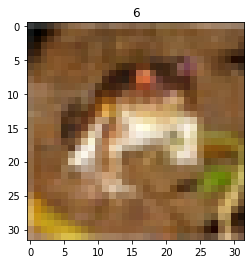

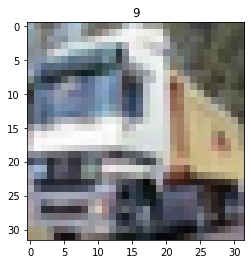

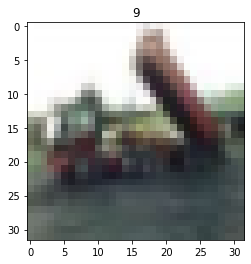

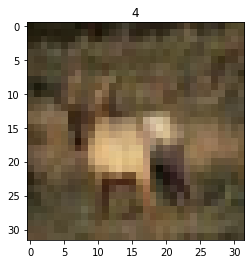

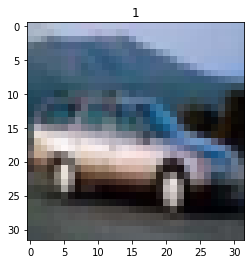

In [8]:
for i in range(5):
  plt.figure(figsize=(5,4))
  plt.imshow(X_train[i])
  plt.title(Y_train[i][0])

In [9]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [46]:
model = Sequential()
model.add(keras.Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3,3), strides=2, activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3,3), activation="relu"))


In [47]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 15, 15, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 32)          9248      
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.add(layers.Conv2D(64, (3,3), activation="relu"))

In [49]:
model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(10,activation='softmax'))

In [50]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 15, 15, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 32)          9248      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               73856     
_________________________________________________________________
dense_5 (Dense)              (None, 10)              

In [51]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train,steps_per_epoch=200,batch_size=64,validation_data=(X_test,y_test),validation_steps=8,epochs=50)

Epoch 1/50
200/200 [==============================] - 3s 17ms/step - loss: 2.7586 - accuracy: 0.0998 - val_loss: 2.7139 - val_accuracy: 0.1152
Epoch 2/50
200/200 [==============================] - 3s 17ms/step - loss: 2.7648 - accuracy: 0.0987 - val_loss: 2.7139 - val_accuracy: 0.1152
Epoch 3/50
200/200 [==============================] - 3s 16ms/step - loss: 2.7636 - accuracy: 0.0991 - val_loss: 2.7139 - val_accuracy: 0.1152
Epoch 4/50
200/200 [==============================] - 3s 16ms/step - loss: 0.5729 - accuracy: 0.1954 - val_loss: 0.2923 - val_accuracy: 0.2324
Epoch 5/50
200/200 [==============================] - 3s 16ms/step - loss: 0.2801 - accuracy: 0.3067 - val_loss: 0.2628 - val_accuracy: 0.3535
Epoch 6/50
200/200 [==============================] - 3s 16ms/step - loss: 0.2617 - accuracy: 0.3697 - val_loss: 0.2538 - val_accuracy: 0.3691
Epoch 7/50
200/200 [==============================] - 3s 16ms/step - loss: 0.2494 - accuracy: 0.4077 - val_loss: 0.2337 - val_accuracy: 0.4277

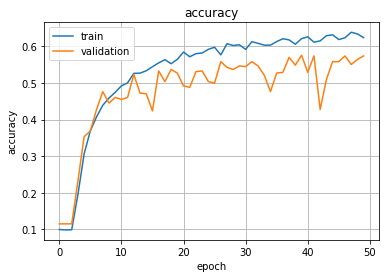

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()

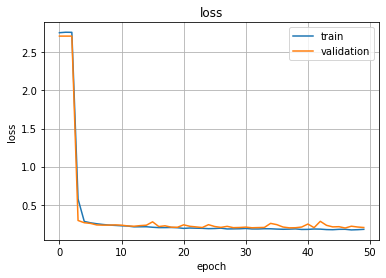

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()


In [55]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [56]:
upload_files()

Saving car.jpg to car.jpg
Saving flog1.jpg to flog1.jpg
Saving flog2.jpg to flog2.jpg
Saving index.jpg to index.jpg
Saving index1.jpg to index1.jpg
Saving index12.jpg to index12.jpg
Saving index123.jpg to index123.jpg


['car.jpg',
 'flog1.jpg',
 'flog2.jpg',
 'index.jpg',
 'index1.jpg',
 'index12.jpg',
 'index123.jpg']

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


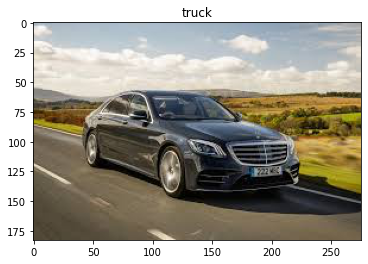

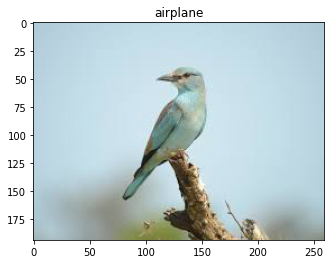

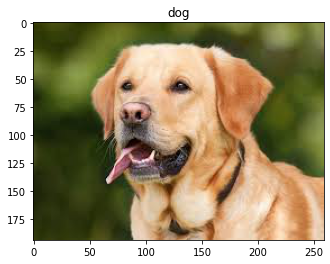

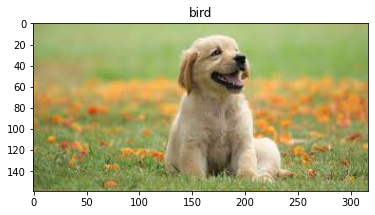

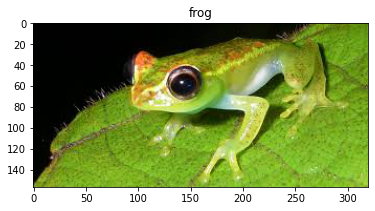

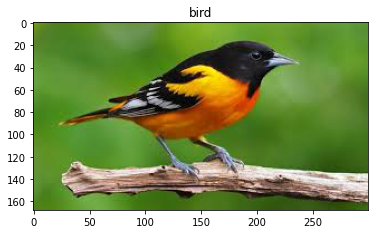

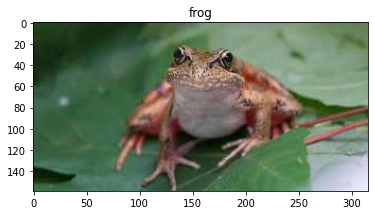

In [57]:
class_ = {0:'airplane', 1:'automobile', 2:'bird',3:'Cat', 4:'deer', 5:'dog', 6:'frog',7:'horse', 8:'ship', 9:'truck'}

from google.colab import files
from keras.preprocessing import image

items = os.listdir('/content')
for fn in items:
  if fn.endswith(".jpg"):
    path = '/content/' + fn
    img = image.load_img(path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    plt.figure()
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    plt.imshow(image.load_img(path))
    #plt.axis('Off')
    plt.title(format(class_[classes[0]]))